In [1]:
#: the usual imports
import babypandas as bpd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import warnings; warnings.simplefilter('ignore')

plt.style.use('fivethirtyeight')

# Lecture 16

### The Normal Curve

In [2]:
#: data set of height/weight of 5000 adult males
height_and_weight = bpd.read_csv('height_and_weight.csv')
height_and_weight

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801
...,...,...
4995,68.860062,177.131052
4996,68.973423,159.285228
4997,67.013795,199.195400
4998,71.557718,185.905909


## Distribution of heights

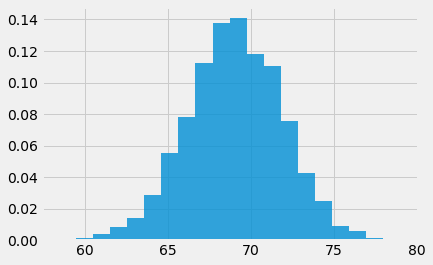

In [3]:
#: height histogram
defaults = dict(bins=20, linewidth=0, density=True, alpha=.8)
plt.hist(height_and_weight.get('Height'), **defaults);

## Distribution of weights

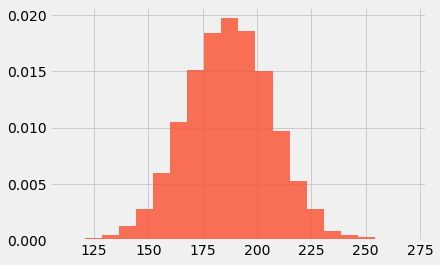

In [4]:
#: weight histogram
plt.hist(height_and_weight.get('Weight'), color='C1', **defaults);

## A familiar shape

- We've seen this bell-like shape frequently.
- These bells are different in two key aspects: center and spread.

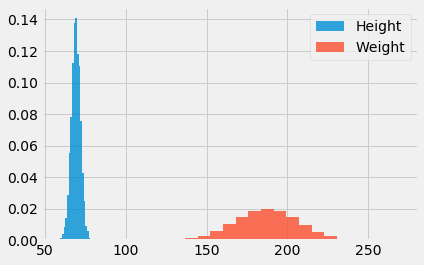

In [5]:
#: draw histograms on same scale
defaults = dict(bins=20, linewidth=0, density=True, alpha=.8)
plt.hist(height_and_weight.get('Height'), label='Height', **defaults);
plt.hist(height_and_weight.get('Weight'), label='Weight', **defaults);
plt.legend(loc='upper right')

## Centering

- Subtracting the mean centers distribution

In [6]:
#: compute mean height
mean_height = height_and_weight.get('Height').mean()
mean_height

69.02634590621741

In [7]:
#: compute mean weight
mean_weight = height_and_weight.get('Weight').mean()
mean_weight

187.0206206581932

In [8]:
#: insert them into table
centered_height_and_weight = height_and_weight.assign(
    Height=height_and_weight.get('Height') - mean_height,
    Weight=height_and_weight.get('Weight') - mean_weight,
)

## Centering

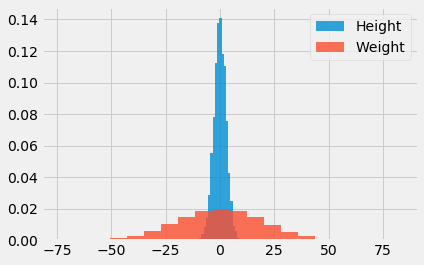

In [9]:
#: plot centered distributions
plt.hist(centered_height_and_weight.get('Height'), label='Height', **defaults);
plt.hist(centered_height_and_weight.get('Weight'), label='Weight', **defaults);
plt.legend(loc='upper right')

## Scaling

- Want distributions to have the same width.
- So we divide by standard deviation.
- Data that is centered and scaled is *standardized*.

In [10]:
import pandas as pd

In [11]:
std_height = np.std(height_and_weight.get('Height'))
std_height

2.863075878119538

In [12]:
std_weight = np.std(height_and_weight.get('Weight'))
std_weight

19.779176302396458

In [13]:
standardized = centered_height_and_weight.assign(
    Height=centered_height_and_weight.get('Height') / std_height,
    Weight=centered_height_and_weight.get('Weight') / std_weight
)

## Standardized Histograms

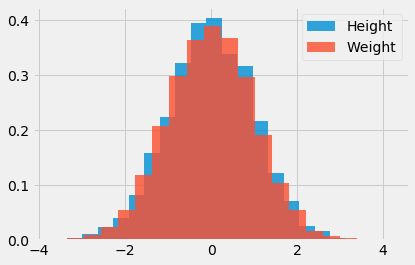

In [14]:
plt.hist(standardized.get('Height'), label='Height', **defaults);
plt.hist(standardized.get('Weight'), label='Weight', **defaults);
plt.legend(loc='upper right')

## The (standard) normal curve

- The bell curves we've seen look essentially the same once standardized.
- This shape is called the **standard normal curve**.

$$
\phi(z) = \frac{1}{\sqrt{2 \pi}} e^{-\frac{1}{2}z^2}
$$


## The standard normal curve

In [15]:
# define normal_curve using numpy
def normal_curve(x):
    return 1 / np.sqrt(2*np.pi) * np.exp(-x**2/2)

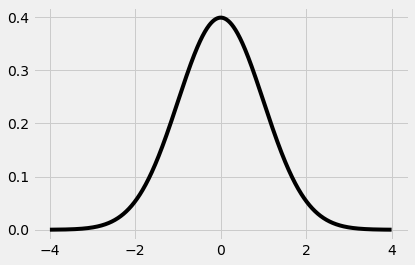

In [16]:
#: plot the curve
x = np.linspace(-4, 4, 1000)
y = normal_curve(x)

plt.plot(x, y, color='black')

## Heights/weights are approximately normal

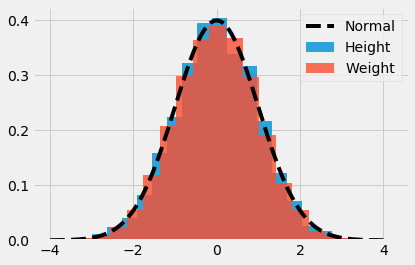

In [17]:
#: plot against normal curve
plt.hist(standardized.get('Height'), label='Height', **defaults);
plt.hist(standardized.get('Weight'), label='Weight', **defaults);
plt.plot(x, y, color='black', linestyle='--', label='Normal')
plt.legend(loc='upper right')

## The normal distribution

- We think of normal curve as a "continuous histogram"
    - a.k.a., probability density
- Mean and median are zero.
- Like a histogram:
    - total area is 1
    - area between $a$ and $b$ is probability of observing value between $a$ and $b$

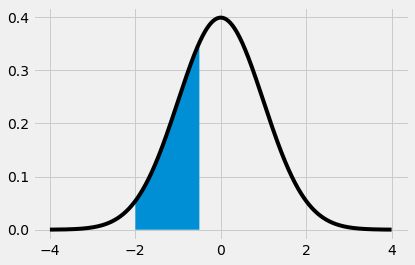

In [18]:
#: area under the curve
[a, b] = [-2, -.5]
ix = (x >= a) & (x <= b)
plt.plot(x, y, color='black')
plt.fill_between(x[ix], y[ix])

## The standard normal "CDF"

- Area under the curve == integration
- No closed-form antiderivative, but we can approximate
- `scipy.stats.norm.cdf(x)`: area under curve from $-\infty$ to $x$
$$
\texttt{scipy.stats.norm.cdf(z)} = \int_{- \infty}^x \phi(z) \, dz
$$

## Discussion question

What will `scipy.stats.norm.cdf(0)` evaluate to?

- A) $\pi$
- B) $0$
- C) $1$
- D) $\frac{1}{2}$
- E) $42$

## Answer

In [22]:
#: calculate area between -infinity and 0
from scipy import stats
stats.norm.cdf(0)

0.5

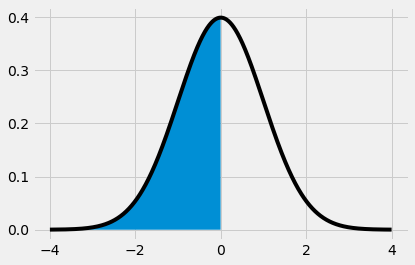

In [23]:
#: area under the curve
[a, b] = [-np.inf, 0]
ix = (x >= a) & (x <= b)
plt.plot(x, y, color='black')
plt.fill_between(x[ix], y[ix])

## Example: area between [-1, 0]

- Strategy: 
$$(\text{area from $-\infty$ to $0$}) - (\text{area from -$\infty$ to $-1$})$$

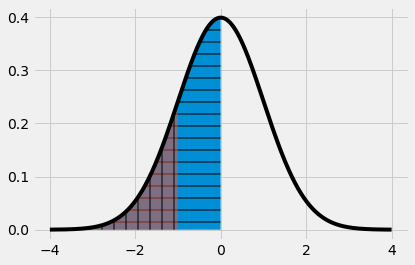

In [24]:
#: area under the curve
[a, b] = [-1, 0]
ix = (x <= b)
ix_out = (x <= a)
plt.plot(x, y, color='black')
plt.fill_between(x[ix], y[ix], hatch='-')
plt.fill_between(x[ix_out], y[ix_out], hatch='|', alpha=.5)

## In general...

- Area within $[a,b]$ is ``stats.norm.cdf(b) - stats.norm.cdf(a)``

## Special cases

- Area within $\pm z$ standard deviations of mean:

$z$ | area
----|-----
1| $\approx$ 68%
2| $\approx$ 95%
3 | $\approx$ 99.73%

## 95% of distribution is between [-2, 2]

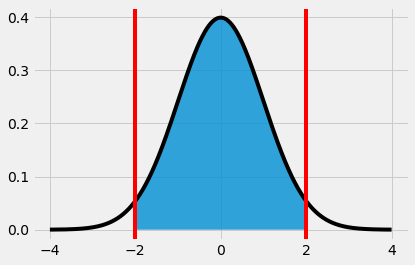

In [33]:
#: area under the curve
[a, b] = [-2, 2]
ix = (x >= a) & (x <= b)
plt.plot(x, y, color='black')
plt.fill_between(x[ix], y[ix], alpha=.8)
plt.axvline(-2, color='red')
plt.axvline(2, color='red')

## Standard units

- What proportion of weights are between 200 and 225?
- We could just count.
- But let's use fact that data is $\approx$ normal.

## Histogram area within [200, 225]...

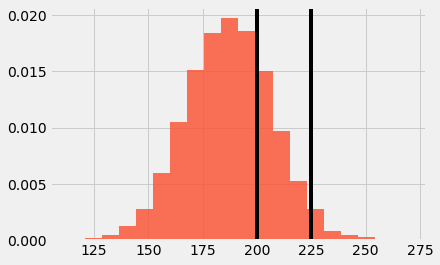

In [40]:
#: weight histogram
plt.hist(height_and_weight.get('Weight'), color='C1', **defaults);
plt.axvline(200, color='black')
plt.axvline(225, color='black')

## Normal curve area within [?, ?]...

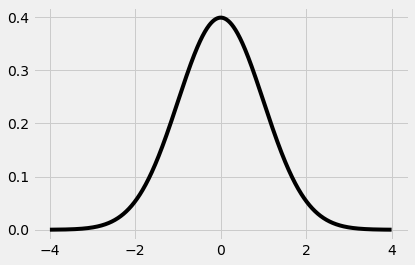

In [41]:
#: normal curve
plt.plot(x, y, color='black')

## Standard units and area

- Define $z(x) = (x - \text{mean})/\text{std}$.
- $z(x)$ maps $x$ to standard units.
- Suppose a distribution is (roughly) normal. These are approx. equal:
    - Area between $a$ and $b$ in histogram.
    - Area between $z(a)$ and $z(b)$ in standard normal curve.

## Standard units

- What does 225 become after standardization?

$$225 \mapsto  \frac{225 - \text{mean}}{\text{std}}$$

In [42]:
#::
(225 - mean_weight) / std_weight

1.9201699181580782

- Interpretation: 225 is 1.92 stds above the mean
- 225 becomes 1.92 in **standard units**.

## Standard units and area

In [43]:
#::
left = (200 - mean_weight) / std_weight
left

0.656214351061435

In [44]:
#::
right = (225 - mean_weight) / std_weight
right

1.9201699181580782

In [45]:
#:: area in standard normal curve
approximation = stats.norm.cdf(right) - stats.norm.cdf(left)
approximation

0.22842488819306406

Approx. 22.8% of weights are between 200 and 225 (inclusive).

## Normal Curve Area Between $z(200)$ and $z(225)$

Text(1.92, 0.45, '$z(225)$')

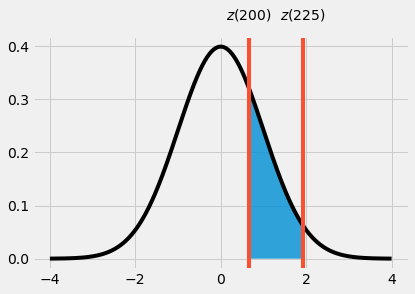

In [65]:
#: normal curve
plt.plot(x, y, color='black')
ix = (x >= .656) & (x <= 1.92)
plt.fill_between(x[ix], y[ix], alpha=.8)
plt.axvline(.656, color='C1')
plt.axvline(1.92, color='C1')
plt.text(.656, .45, '$z(200)$', ha='center')
plt.text(1.92, .45, '$z(225)$', ha='center')


## Checking the approximation

In [66]:
height_and_weight[
    (height_and_weight.get('Weight') >= 200)
    &
    (height_and_weight.get('Weight') <= 225)
].shape[0] / height_and_weight.shape[0]

0.2294

In [67]:
#: approximation from using CDF
approximation

0.22842488819306406

## To summarize:

- Suppose we know the following about a distribution:
    - it is approximately normal,
    - its mean and standard deviation,
- We can use CDF to compute percentiles without using the data itself.

## Chebychev and the normal curve

- Chebychev: At *least* $1-1/z^2$ percent of data are within $z$ stds of the mean.
- Works for any distribution.
- We can do better if we know the distribution is normal:


$z$ | Chebychev | Normal
----|-----|------
1| $\geq$ 0% | $\approx$ 68%
2| $\geq$ 75% | $\approx$ 95%
3 | $\geq$ 88% | $\approx$ 99.73%

# The Central Limit Theorem

## Question

Why do we see bell curves so often?

## Bell-shaped data

- Data distribution is often bell-shaped (some more than others)
- We've seen this to be true for height and weight.
- But many more examples...

## Example: Baseball runners left on base

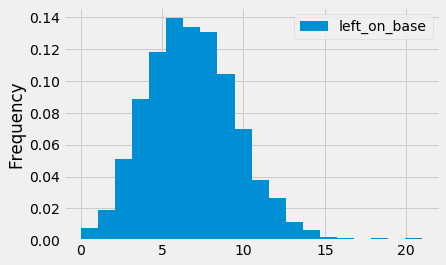

In [70]:
#:
bpd.read_csv('baseball.csv').plot(kind='hist', y='left_on_base', bins=20, density=True)

## Example: Natural sleep duration

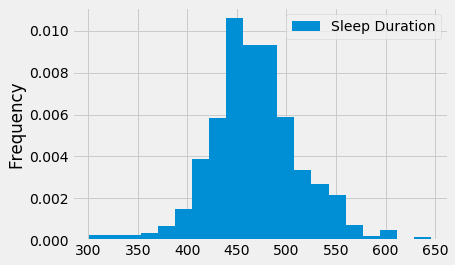

In [71]:
bpd.read_csv('sleep.csv').plot(kind='hist', y='Sleep Duration', bins=20, density=True)

## But...

- ...most data isn't bell-shaped!
- Skewed to one side, multi-modal, etc.

## Example: San Diego city salaries

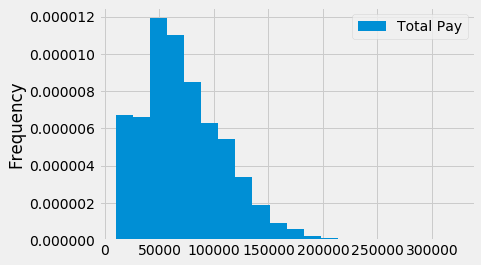

In [72]:
#:
bpd.read_csv('salaries.csv').plot(kind='hist', y='Total Pay', bins=20, density=True)

## Example: Flight delays

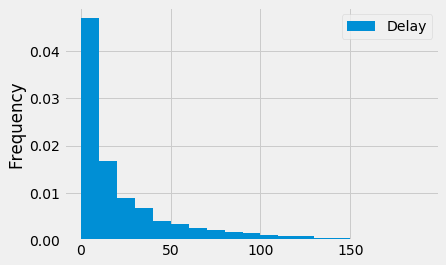

In [78]:
#:
flights = bpd.read_csv('./united_summer2015.csv').get(['Delay'])
flights.plot(kind='hist', y='Delay', bins=np.arange(0, 200, 10), density=True)

## But...

- ...even when population distribution isn't bell-shaped, empirical distribution of statistics often are.
- Example: distribution of sample mean.

## Example: Flight delays

- We want to know the average flight delay.
- We take a random sample of flights, compute sample mean.
- The sample mean could have been different!

In [80]:
#: draw 1000 sample means
n_samples = 1000

sample_means = np.array([])

for i in np.arange(n_samples):
    sample = flights.sample(2000, replace=True)
    sample_mean = sample.get('Delay').mean()
    sample_means = np.append(sample_means, sample_mean)

## Example: flight delays

Text(0.5, 0, 'Sample Mean Delay')

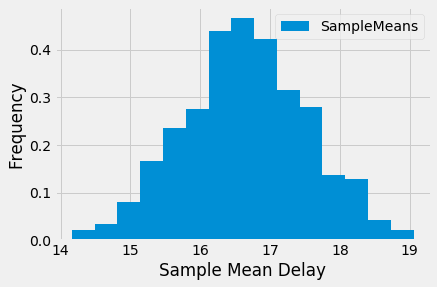

In [87]:
#: visualize
bpd.DataFrame().assign(SampleMeans=sample_means).plot(kind='hist', bins=15, density=True)
plt.xlabel('Sample Mean Delay')

## A ubiquitous phenomenon

- The population was not normal, but distribution of sample mean is.
- All of the bootstrap distributions we saw were bell-shaped.
- This appears to be a deep fact about randomness.

## The Central Limit Theorem

> The distribution of sums (and averages) of large random samples (w/ replacement) are roughly normal, regardless of the distribution of the population from which the sample was drawn

## Example: Scratch-off lottery tickets

- Table below shows the odds of each payout of a lottery ticket

In [90]:
lottery = bpd.DataFrame().assign(
    Prize=[0, 1, 5, 20, 50],
    Odds=[.4, .3, .2, .05, .05]
)
lottery

,Prize,Odds
0,0,0.40
1,1,0.30
2,5,0.20
3,20,0.05
4,50,0.05


## Example: Lottery tickets

- Each ticket costs $5; subtract from payout
- Very non-normal distribution

In [91]:
#:
payout = lottery.assign(GainLoss=lottery.get('Prize') - 5)
payout

,Prize,Odds,GainLoss
0,0,0.40,-5
1,1,0.30,-4
2,5,0.20,0
3,20,0.05,15
4,50,0.05,45


## Simulating one lottery ticket

- Choose a payout according to odds.
- `np.random.choice` accepts an array of probabilities.

In [101]:
# randomly choose a payout according to odds
np.random.choice(payout.get('GainLoss'), p=payout.get('Odds'))

-4

## Simulating 100 tickets

- How much do you win/lose after buying 100 tickets?

In [134]:
gl = np.array(payout.get('GainLoss'))
odds = np.array(payout.get('Odds'))

def buy_k_tickets(k):
    winnings = np.array([])

    for i in np.arange(k):
        won = np.random.choice(gl, p = odds)
        winnings = np.append(winnings, won)
        
    return winnings

## Repeating the experiment

- After purchasing 100 tickets, your total winnings are a number.
- But it could have been different...
- Total winnings come from some distribution.
- We can approximate it through simulation.

## Repeating the experiment

In [172]:
#: simulate

distribution = np.array([])
n_repetitions = 1000

for i in np.arange(n_repetitions):
    winnings = buy_k_tickets(100).sum()
    distribution = np.append(distribution, winnings)

## Visualizing

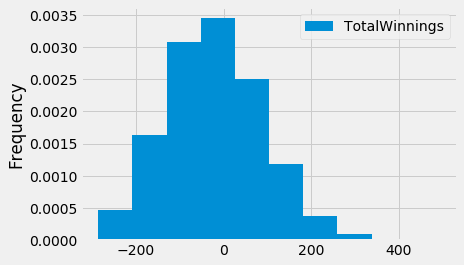

In [173]:
#: does it look normal?
bpd.DataFrame().assign(TotalWinnings=distribution).plot(kind='hist', density=True)

## Discussion question

How will the distribution change if the experiment were repeated, but with 400 tickets instead of 100?

- A) It will get narrower.
- B) It will get wider.
- C) It will stay the same.
- D) It will turn red.

## Answer

In [174]:
#: simulate

distribution_400 = np.array([])
n_repetitions = 1000

for i in np.arange(n_repetitions):
    winnings = buy_k_tickets(400).sum()
    distribution_400 = np.append(distribution_400, winnings)

## Answer

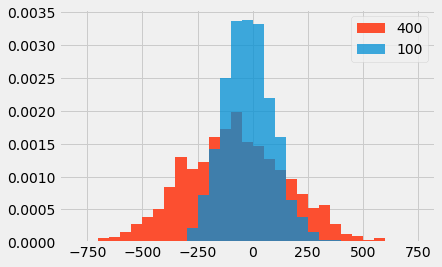

In [176]:
#: does it look normal?
bins = np.arange(-800, 800, 50)
plt.hist(distribution_400, color='C1', bins=bins, density=True, label='400');
plt.hist(distribution, bins=bins, density=True, alpha=.75, label='100');
plt.legend()

## The shape of the distribution

- CLT: Sums and averages of random samples are roughly normal.
- Centered at population mean.
- What is the spread of the distribution?

In [179]:
#: draw `sample_size` flights, compute mean, `n_samples` times
def sample_mean_delays(sample_size, n_samples=2000):
    sample_means = np.array([])
    for i in np.arange(n_samples):
        sample = flights.sample(sample_size)
        sample_mean = sample.get('Delay').mean()
        sample_means = np.append(sample_means, sample_mean)
    return sample_means

In [180]:
#: repeat the experiment for various sample sizes
sample_means = {}
sample_sizes = [100, 200, 400, 800, 1600]

for size in sample_sizes:
    sample_means[size] = sample_mean_delays(size)

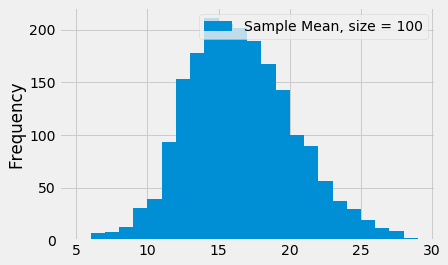

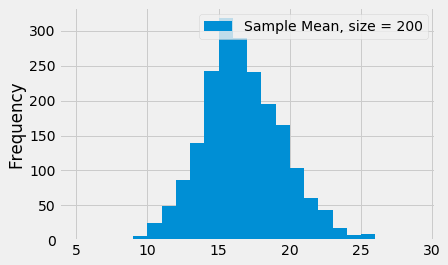

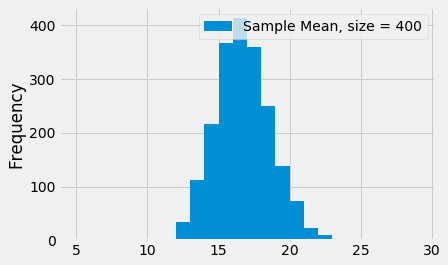

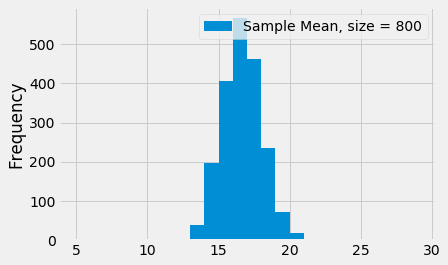

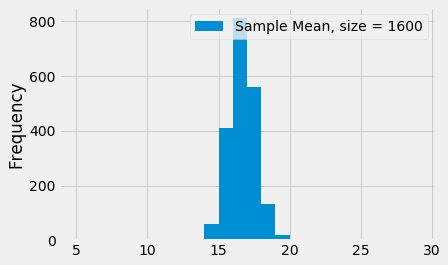

In [184]:
#: plot the distributions
bins = np.arange(5, 30)
for size in sample_sizes:
    columns = {f'Sample Mean, size = {size}': sample_means[size]}
    bpd.DataFrame().assign(**columns).plot(kind='hist', bins=bins)

In [185]:
#: compute standard deviation of each distribution
sds = []
for size in sample_sizes:
    sd = np.std(sample_means[size])
    sds.append(sd)

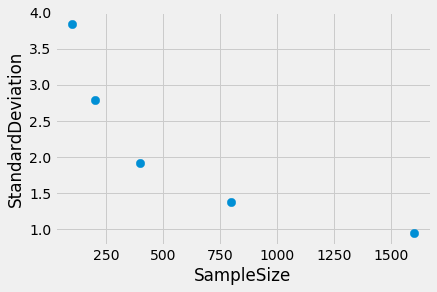

In [191]:
#: plot trend
observed = bpd.DataFrame().assign(
    SampleSize=sample_sizes,
    StandardDeviation=sds
)

observed.plot(kind='scatter', x='SampleSize', y='StandardDeviation', s=70)

## CLT for the sample mean

- Sample mean of random samples is distributed normally.
- Centered at population mean.
- Standard deviation is:
$$
    \frac{
        \text{population standard dev.}
    }{
        \sqrt{\text{sample size}}
    }
$$

In [197]:
#: clt's prediction
def clt_standard_deviation(n):
    sigma = np.std(flights.get('Delay'))
    return sigma / np.sqrt(n)

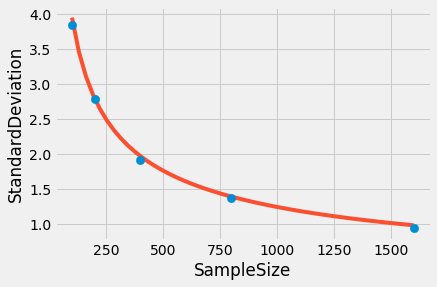

In [205]:
#: plot prediction and observed
observed.plot(kind='scatter', x='SampleSize', y='StandardDeviation', s=70, zorder=10)
x = np.linspace(100, 1600)
y = clt_standard_deviation(x)
plt.plot(x, y, color='C1')

## Recap

- We want to find population mean.
- But we only have one sample.
- Hope that sample mean is close to population mean.
- But it could have been different.

## Recap

- We can run bootstrap, or (sometimes) draw more samples to approximate sampling distribution.
- But CLT says that it is normal.
- Centered at population mean.
- Standard deviation is:
$$
    \frac{
        \text{population standard dev.}
    }{
        \sqrt{\text{sample size}}
    }
$$